# This notebook is to create some indicator functions.

In [123]:
# Basic imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.optimize as spo
import sys
from time import time
from sklearn.metrics import r2_score, median_absolute_error

%matplotlib inline

%pylab inline
pylab.rcParams['figure.figsize'] = (20.0, 10.0)

%load_ext autoreload
%autoreload 2

sys.path.append('../../')

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/miguel/anaconda3/envs/cap_env/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['close']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## RSI

In [124]:
total_data_df = pd.read_pickle('../../data/data_df.pkl')

In [125]:
SYMBOL = 'AAPL'
data_df = total_data_df[SYMBOL].unstack()
data_df.head()

feature,Close,High,Low,Open,Volume
date,,,,,
1993-01-29,2.12,2.19,2.11,0.0,66525200.0
1993-02-01,2.19,2.19,2.12,0.0,60138400.0
1993-02-02,2.15,2.20,2.15,0.0,45584000.0
1993-02-03,2.14,2.18,2.09,0.0,66046400.0
1993-02-04,2.12,2.15,2.11,0.0,52038000.0


In [126]:
window = 14

In [127]:
from stockstats import StockDataFrame

In [128]:
s_data = StockDataFrame.retype(data_df)

In [129]:
rsi_s = s_data['rsi_14']
print(rsi_s.shape)
rsi_s.head()

(6024,)


date
1993-01-29           NaN
1993-02-01    100.000000
1993-02-02     61.904762
1993-02-03     56.146179
1993-02-04     46.774537
Name: rsi_14, dtype: float64

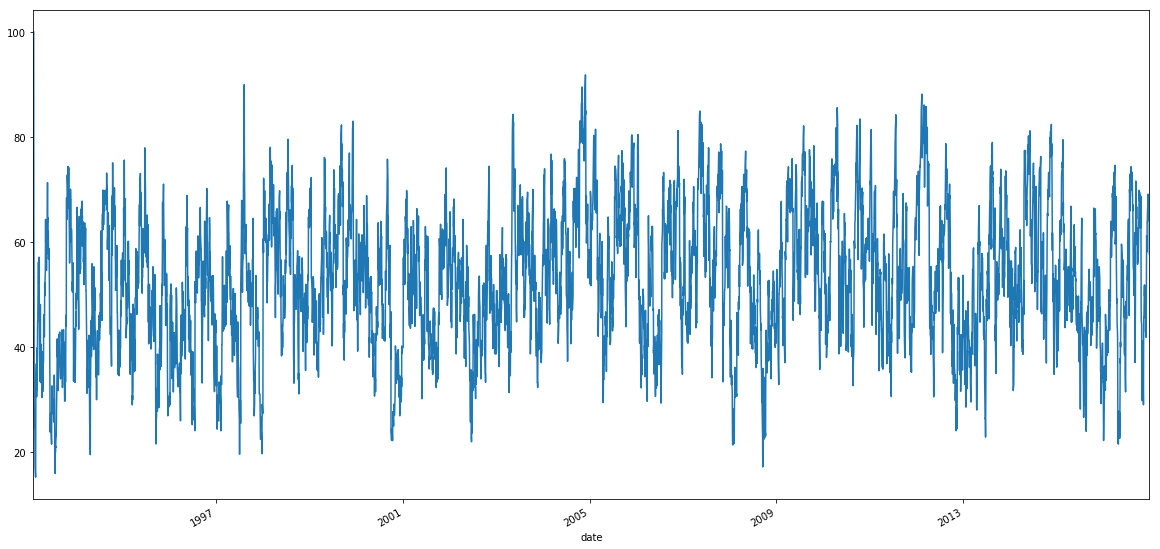

In [130]:
rsi_s.plot()

In [131]:
def rsi(price, n=14):
    ''' rsi indicator '''
    gain = (price-price.shift(1)).fillna(0) # calculate price gain with previous day, first row nan is filled with 0

    def rsiCalc(p):
        # subfunction for calculating rsi for one lookback period
        avgGain = p[p>0].sum()/n
        avgLoss = -p[p<0].sum()/n 
        rs = avgGain/avgLoss
        return 100 - 100/(1+rs)

    # run for all periods with rolling_apply
    return pd.rolling_apply(gain,n,rsiCalc) 

In [132]:
data_df

,close,high,low,open,volume,close_-1_s,close_-1_d,rs_14,rsi_14
date,,,,,,,,,
1993-01-29,2.12,2.19,2.11,0.00,66525200.0,NaN,NaN,NaN,NaN
1993-02-01,2.19,2.19,2.12,0.00,60138400.0,2.12,0.07,inf,100.000000
1993-02-02,2.15,2.20,2.15,0.00,45584000.0,2.19,-0.04,1.625000,61.904762
1993-02-03,2.14,2.18,2.09,0.00,66046400.0,2.15,-0.01,1.280303,56.146179
1993-02-04,2.12,2.15,2.11,0.00,52038000.0,2.14,-0.02,0.878800,46.774537
1993-02-05,2.04,2.12,2.01,0.00,91904400.0,2.12,-0.08,0.373816,27.210022
1993-02-08,2.02,2.05,1.98,0.00,70268800.0,2.04,-0.02,0.323732,24.455987
1993-02-09,2.03,2.05,2.02,0.00,59665200.0,2.02,0.01,0.395875,28.360338
1993-02-10,1.99,2.04,1.96,0.00,67071200.0,2.03,-0.04,0.302017,23.196079


In [133]:
rsi_2 = rsi(data_df['close'])

/home/miguel/anaconda3/envs/cap_env/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=14,center=False).apply(func=<function>,args=<tuple>,kwargs=<dict>)
  del sys.path[0]


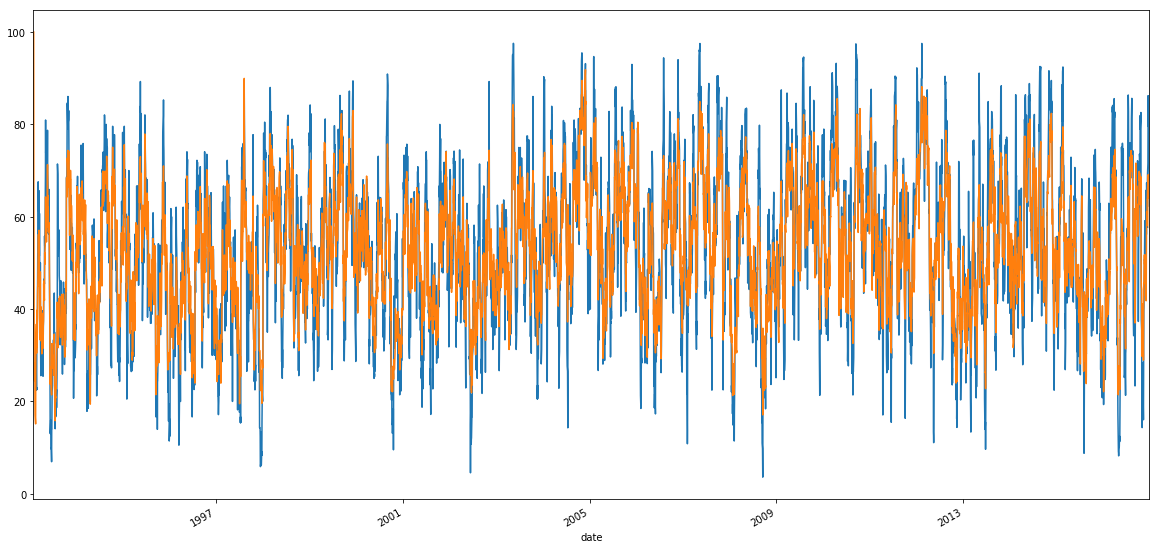

In [134]:
rsi_2.plot()
rsi_s.plot()

In [135]:
rsi_2

date
1993-01-29          NaN
1993-02-01          NaN
1993-02-02          NaN
1993-02-03          NaN
1993-02-04          NaN
1993-02-05          NaN
1993-02-08          NaN
1993-02-09          NaN
1993-02-10          NaN
1993-02-11          NaN
1993-02-12          NaN
1993-02-16          NaN
1993-02-17          NaN
1993-02-18    32.608696
1993-02-19    32.608696
1993-02-22    22.500000
1993-02-23    23.076923
1993-02-24    22.500000
1993-02-25    30.952381
1993-02-26    31.707317
1993-03-01    35.000000
1993-03-02    39.534884
1993-03-03    45.000000
1993-03-04    48.717949
1993-03-05    55.882353
1993-03-08    67.567568
1993-03-09    65.714286
1993-03-10    61.290323
1993-03-11    61.290323
1993-03-12    56.250000
                ...    
2016-11-17    39.671233
2016-11-18    40.429043
2016-11-21    50.674157
2016-11-22    50.590884
2016-11-23    54.221954
2016-11-25    59.133127
2016-11-28    53.918919
2016-11-29    51.402525
2016-11-30    48.801598
2016-12-01    56.558642
2016-12-02 

In [136]:
comp_df = pd.DataFrame({'rsi_s':rsi_s, 'rsi_2':rsi_2})
comp_df

,rsi_2,rsi_s
date,,
1993-01-29,NaN,NaN
1993-02-01,NaN,100.000000
1993-02-02,NaN,61.904762
1993-02-03,NaN,56.146179
1993-02-04,NaN,46.774537
1993-02-05,NaN,27.210022
1993-02-08,NaN,24.455987
1993-02-09,NaN,28.360338
1993-02-10,NaN,23.196079


In [137]:
def rsi(price, n=14):
    ''' rsi indicator '''
    gain = (price-price.shift(1)).fillna(0) # calculate price gain with previous day, first row nan is filled with 0

    def rsiCalc(p):
        # subfunction for calculating rsi for one lookback period
        avgGain = p[p>0].sum()/n
        avgLoss = -p[p<0].sum()/n 
        rs = avgGain/avgLoss
        return 100 - 100/(1+rs)

    # run for all periods with rolling_apply
    return pd.rolling_apply(gain,n,rsiCalc) 

In [138]:
total_data_df = pd.read_pickle('../../data/data_df.pkl')
SYMBOL = 'AAPL'
data_df = total_data_df[SYMBOL].unstack()
price_df = data_df['Close']
price_df.head()

date
1993-01-29    2.12
1993-02-01    2.19
1993-02-02    2.15
1993-02-03    2.14
1993-02-04    2.12
Name: Close, dtype: float64

In [139]:
def rsi_tot(price_df):
    delta = price_df.diff().fillna(0)
    mean_up = delta[delta > 0].mean()
    mean_down = -delta[delta < 0].mean()
    rs = mean_up / mean_down
    return 1 - (1 / (1 + rs))

In [140]:
rsi_tot(price_df.iloc[:14])

0.5212355212355209

In [141]:
rsi(price_df.iloc[:14])

/home/miguel/anaconda3/envs/cap_env/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=14,center=False).apply(func=<function>,args=<tuple>,kwargs=<dict>)
  del sys.path[0]


date
1993-01-29          NaN
1993-02-01          NaN
1993-02-02          NaN
1993-02-03          NaN
1993-02-04          NaN
1993-02-05          NaN
1993-02-08          NaN
1993-02-09          NaN
1993-02-10          NaN
1993-02-11          NaN
1993-02-12          NaN
1993-02-16          NaN
1993-02-17          NaN
1993-02-18    32.608696
Name: Close, dtype: float64

In [142]:
delta = price_df.iloc[:14].diff().fillna(0)

In [143]:
delta[delta > 0].mean()

0.03749999999999992

In [144]:
-delta[delta < 0].mean()

0.03444444444444442

In [145]:
delta[delta > 0].mean() / (-delta[delta < 0].mean())

1.0887096774193532

In [146]:
price_df.iloc[:14].shape

(14,)

In [147]:
delta[delta > 0].sum() / (-delta[delta < 0].sum())

0.4838709677419347

In [148]:
price_df.diff()

date
1993-01-29     NaN
1993-02-01    0.07
1993-02-02   -0.04
1993-02-03   -0.01
1993-02-04   -0.02
1993-02-05   -0.08
1993-02-08   -0.02
1993-02-09    0.01
1993-02-10   -0.04
1993-02-11   -0.02
1993-02-12   -0.05
1993-02-16   -0.03
1993-02-17    0.03
1993-02-18    0.04
1993-02-19    0.00
1993-02-22    0.01
1993-02-23   -0.03
1993-02-24   -0.02
1993-02-25    0.04
1993-02-26   -0.07
1993-03-01    0.01
1993-03-02    0.04
1993-03-03    0.01
1993-03-04    0.01
1993-03-05    0.00
1993-03-08    0.06
1993-03-09    0.01
1993-03-10    0.00
1993-03-11    0.00
1993-03-12   -0.02
              ... 
2016-11-17   -0.04
2016-11-18    0.11
2016-11-21    1.67
2016-11-22    0.07
2016-11-23   -0.57
2016-11-25    0.56
2016-11-28   -0.22
2016-11-29   -0.11
2016-11-30   -0.94
2016-12-01   -1.03
2016-12-02    0.41
2016-12-05   -0.79
2016-12-06    0.84
2016-12-07    1.08
2016-12-08    1.09
2016-12-09    1.83
2016-12-12   -0.65
2016-12-13    1.89
2016-12-14    0.00
2016-12-15    0.63
2016-12-16    0.15
2016-12

/home/miguel/anaconda3/envs/cap_env/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(com=14,min_periods=0,adjust=True,ignore_na=False).mean()
  from ipykernel import kernelapp as app
/home/miguel/anaconda3/envs/cap_env/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(com=14,min_periods=0,adjust=True,ignore_na=False).mean()
  app.launch_new_instance()
/home/miguel/anaconda3/envs/cap_env/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=14,center=False).mean()
/home/miguel/anaconda3/envs/cap_env/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: pd.rolling_mean is deprecated for Series and w

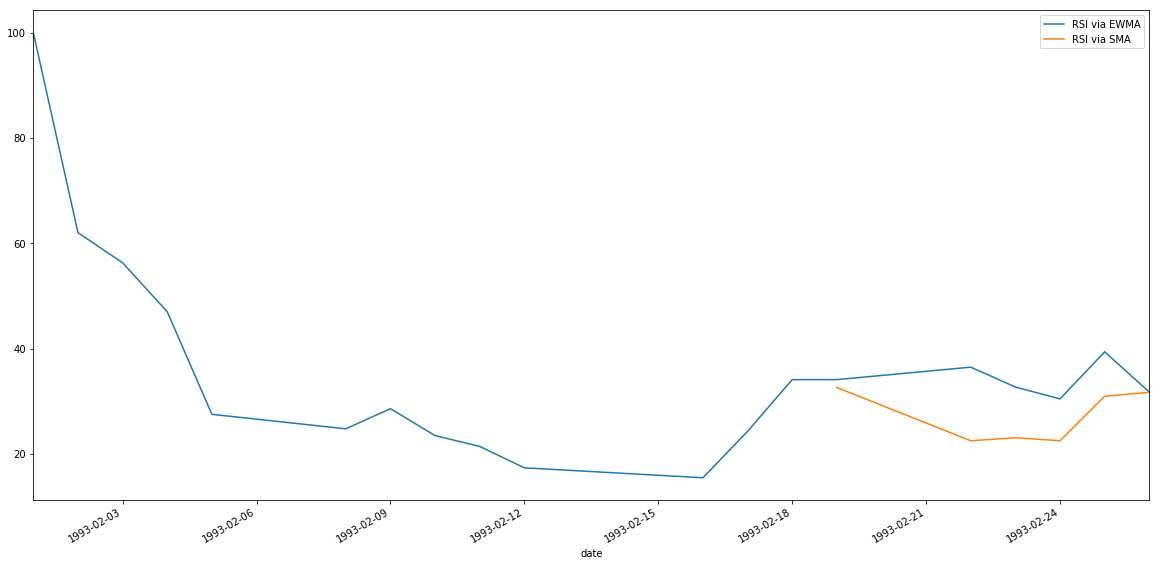

In [149]:
close = data_df['Close'].iloc[:20]

# Get the difference in price from previous step
delta = close.diff()
# Get rid of the first row, which is NaN since it did not have a previous 
# row to calculate the differences
delta = delta[1:] 

# Make the positive gains (up) and negative gains (down) Series
up, down = delta.copy(), delta.copy()
up[up < 0] = 0
down[down > 0] = 0

# Calculate the EWMA
roll_up1 = pd.stats.moments.ewma(up, window)
roll_down1 = pd.stats.moments.ewma(down.abs(), window)

# Calculate the RSI based on EWMA
RS1 = roll_up1 / roll_down1
RSI1 = 100.0 - (100.0 / (1.0 + RS1))

# Calculate the SMA
roll_up2 = pd.rolling_mean(up, window)
roll_down2 = pd.rolling_mean(down.abs(), window)

# Calculate the RSI based on SMA
RS2 = roll_up2 / roll_down2
RSI2 = 100.0 - (100.0 / (1.0 + RS2))

# Compare graphically
plt.figure()
RSI1.plot()
RSI2.plot()
plt.legend(['RSI via EWMA', 'RSI via SMA'])
plt.show()

### I will use the SMA method

In [150]:
def rsi(data_df, window):
    close = data_df['Close']
    delta = close.diff()
    delta = delta.iloc[1:]
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    roll_up = up.rolling(window=window, center=False).mean()
    roll_down = down.abs().rolling(window=window, center=False).mean()
    rs = roll_up / roll_down
    return 100.0 - (100.0 / (1.0 + rs))

In [151]:
(rsi_2 - rsi(data_df, 14)).abs().max()

1.3500311979441904e-13

In [152]:
data_df.shape

(6024, 5)

In [153]:
rsi(data_df, 14).shape

(6023,)

In [154]:
data_df['rsi'] = rsi(data_df,14)
data_df.head(20)

feature,Close,High,Low,Open,Volume,rsi
date,,,,,,
1993-01-29,2.12,2.19,2.11,0.0,66525200.0,NaN
1993-02-01,2.19,2.19,2.12,0.0,60138400.0,NaN
1993-02-02,2.15,2.20,2.15,0.0,45584000.0,NaN
1993-02-03,2.14,2.18,2.09,0.0,66046400.0,NaN
1993-02-04,2.12,2.15,2.11,0.0,52038000.0,NaN
1993-02-05,2.04,2.12,2.01,0.0,91904400.0,NaN
1993-02-08,2.02,2.05,1.98,0.0,70268800.0,NaN
1993-02-09,2.03,2.05,2.02,0.0,59665200.0,NaN
1993-02-10,1.99,2.04,1.96,0.0,67071200.0,NaN


In [155]:
from recommender import indicator_functions as ifun

In [156]:
ifun.rsi(data_df, 14)

0.6231884057971004

## On Balance Volume

In [157]:
close

date
1993-01-29    2.12
1993-02-01    2.19
1993-02-02    2.15
1993-02-03    2.14
1993-02-04    2.12
1993-02-05    2.04
1993-02-08    2.02
1993-02-09    2.03
1993-02-10    1.99
1993-02-11    1.97
1993-02-12    1.92
1993-02-16    1.89
1993-02-17    1.92
1993-02-18    1.96
1993-02-19    1.96
1993-02-22    1.97
1993-02-23    1.94
1993-02-24    1.92
1993-02-25    1.96
1993-02-26    1.89
Name: Close, dtype: float64

In [158]:
data_df['sign'] = data_df['Close'].diff() > 0
volume = data_df.iloc[1:]['Volume']

In [159]:
volume[data_df['sign']].sum()

347297584482.0

In [160]:
data_df['sign'] = np.sign(data_df['Close'].diff())
data_df.head(20)

feature,Close,High,Low,Open,Volume,rsi,sign
date,,,,,,,
1993-01-29,2.12,2.19,2.11,0.0,66525200.0,NaN,NaN
1993-02-01,2.19,2.19,2.12,0.0,60138400.0,NaN,1.0
1993-02-02,2.15,2.20,2.15,0.0,45584000.0,NaN,-1.0
1993-02-03,2.14,2.18,2.09,0.0,66046400.0,NaN,-1.0
1993-02-04,2.12,2.15,2.11,0.0,52038000.0,NaN,-1.0
1993-02-05,2.04,2.12,2.01,0.0,91904400.0,NaN,-1.0
1993-02-08,2.02,2.05,1.98,0.0,70268800.0,NaN,-1.0
1993-02-09,2.03,2.05,2.02,0.0,59665200.0,NaN,1.0
1993-02-10,1.99,2.04,1.96,0.0,67071200.0,NaN,-1.0


In [161]:
#obv_delta = data_df.iloc[1:]['Volume'] * data_df.iloc[1:]['sign']
obv_delta = data_df.iloc[1:]['Volume'] * np.sign(data_df['Close'].diff()).iloc[1:]
obv_delta[:20]

date
1993-02-01     60138400.0
1993-02-02    -45584000.0
1993-02-03    -66046400.0
1993-02-04    -52038000.0
1993-02-05    -91904400.0
1993-02-08    -70268800.0
1993-02-09     59665200.0
1993-02-10    -67071200.0
1993-02-11    -42067200.0
1993-02-12    -68849200.0
1993-02-16   -101934000.0
1993-02-17     62395200.0
1993-02-18     70030800.0
1993-02-19            0.0
1993-02-22     24690400.0
1993-02-23    -48518400.0
1993-02-24    -71668800.0
1993-02-25     41806800.0
1993-02-26    -73721200.0
1993-03-01     29825600.0
dtype: float64

In [162]:
def on_volume_balance(data_df, window):
    data_df['sign'] = np.sign(data_df['Close'].diff())
    obv_delta = data_df.iloc[1:]['Volume'] * np.sign(data_df['Close'].diff()).iloc[1:]
    return obv_delta.rolling(window=window, center=False).sum()

In [163]:
data_df['obv'] = on_volume_balance(data_df, 14)
data_df.head(20)

feature,Close,High,Low,Open,Volume,rsi,sign,obv
date,,,,,,,,
1993-01-29,2.12,2.19,2.11,0.0,66525200.0,NaN,NaN,NaN
1993-02-01,2.19,2.19,2.12,0.0,60138400.0,NaN,1.0,NaN
1993-02-02,2.15,2.20,2.15,0.0,45584000.0,NaN,-1.0,NaN
1993-02-03,2.14,2.18,2.09,0.0,66046400.0,NaN,-1.0,NaN
1993-02-04,2.12,2.15,2.11,0.0,52038000.0,NaN,-1.0,NaN
1993-02-05,2.04,2.12,2.01,0.0,91904400.0,NaN,-1.0,NaN
1993-02-08,2.02,2.05,1.98,0.0,70268800.0,NaN,-1.0,NaN
1993-02-09,2.03,2.05,2.02,0.0,59665200.0,NaN,1.0,NaN
1993-02-10,1.99,2.04,1.96,0.0,67071200.0,NaN,-1.0,NaN


In [164]:
data_df['obv'].describe()

count    5.995000e+03
mean     7.500241e+07
std      5.618683e+08
min     -3.460166e+09
25%     -1.878797e+08
50%      4.779407e+07
75%      3.358455e+08
max      3.817716e+09
Name: obv, dtype: float64

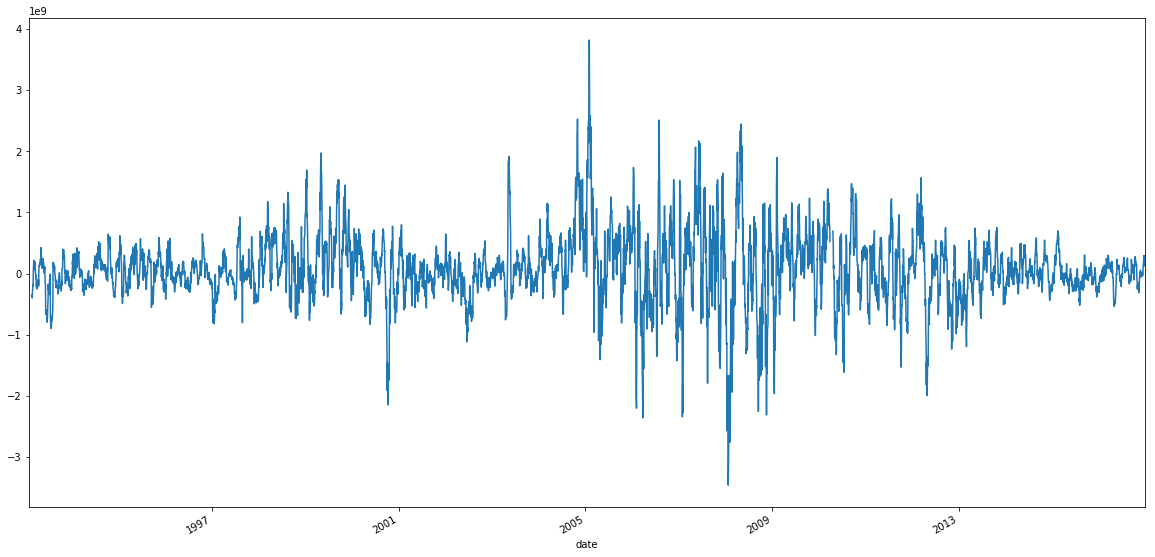

In [165]:
data_df['obv'].plot()

In [166]:
from sklearn.preprocessing import StandardScaler

In [167]:
scaler = StandardScaler()
obv_standarized = scaler.fit_transform(data_df['obv'].fillna(0).values.reshape(-1,1))

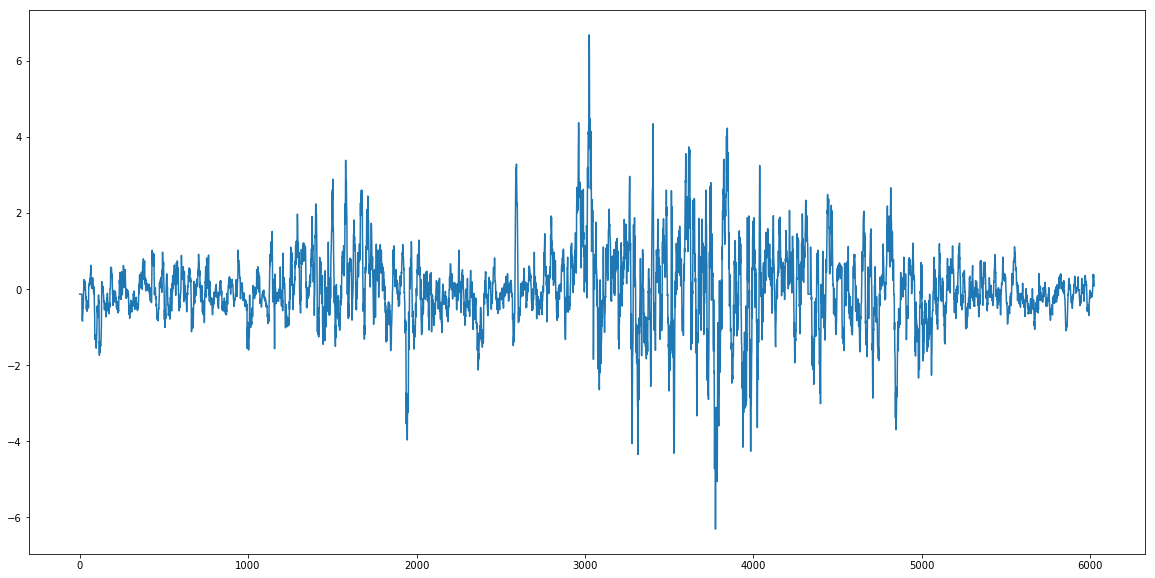

In [168]:
plt.plot(obv_standarized)

## Standarized price (Bollinger Bands generalized)

In [169]:
close = data_df['Close']
data_df['std_price'] = close.rolling(window=14, center=False).apply(lambda x: (x[-1] - x.mean()) / x.std())
data_df.head(20)

feature,Close,High,Low,Open,Volume,rsi,sign,obv,std_price
date,,,,,,,,,
1993-01-29,2.12,2.19,2.11,0.0,66525200.0,NaN,NaN,NaN,NaN
1993-02-01,2.19,2.19,2.12,0.0,60138400.0,NaN,1.0,NaN,NaN
1993-02-02,2.15,2.20,2.15,0.0,45584000.0,NaN,-1.0,NaN,NaN
1993-02-03,2.14,2.18,2.09,0.0,66046400.0,NaN,-1.0,NaN,NaN
1993-02-04,2.12,2.15,2.11,0.0,52038000.0,NaN,-1.0,NaN,NaN
1993-02-05,2.04,2.12,2.01,0.0,91904400.0,NaN,-1.0,NaN,NaN
1993-02-08,2.02,2.05,1.98,0.0,70268800.0,NaN,-1.0,NaN,NaN
1993-02-09,2.03,2.05,2.02,0.0,59665200.0,NaN,1.0,NaN,NaN
1993-02-10,1.99,2.04,1.96,0.0,67071200.0,NaN,-1.0,NaN,NaN


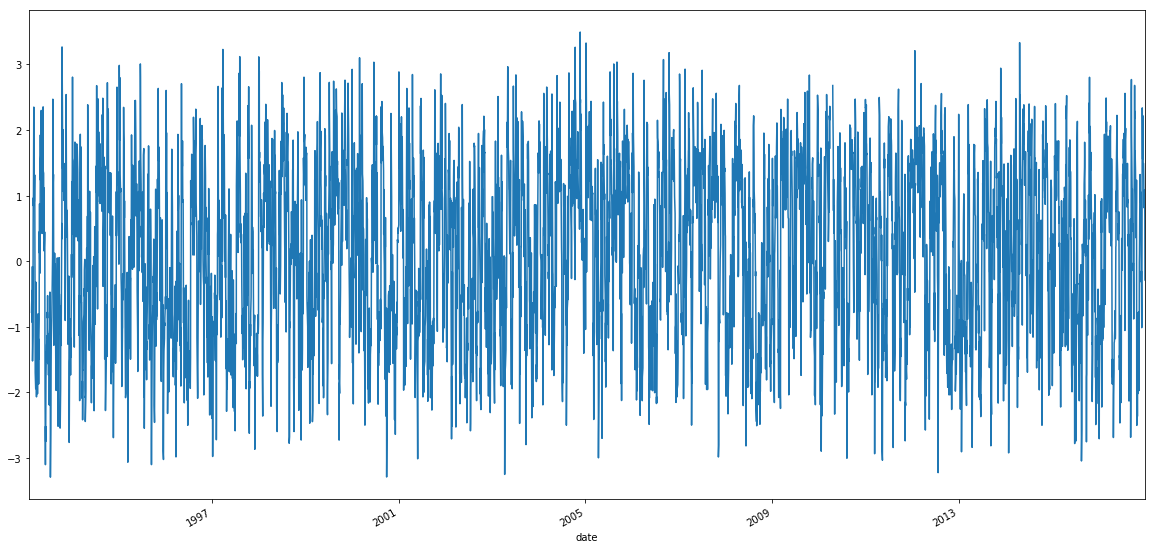

In [170]:
data_df['std_price'].plot()

In [171]:
def z_score(data_df, window=14):
    close = data_df['Close']
    return close.rolling(window=window, center=False).apply(lambda x: (x[-1] - x.mean()) / x.std())

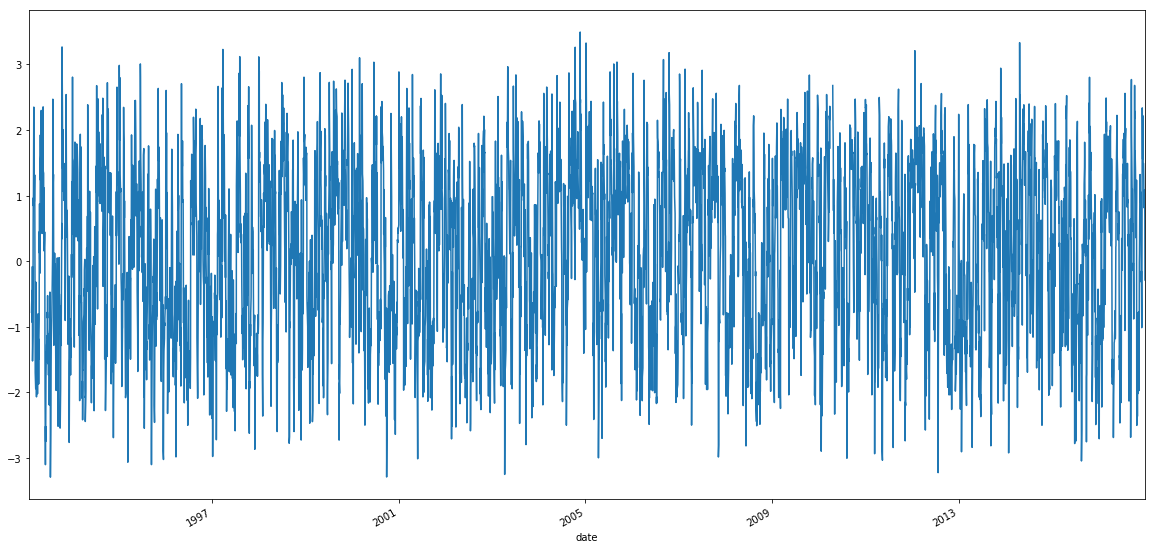

In [172]:
z_score(data_df).plot()

## Let's test the scaling system

In [173]:
from recommender.indicator import Indicator
import recommender.indicator_functions as indf

In [174]:
total_data_df = pd.read_pickle('../../data/data_df.pkl')
SYMBOL = 'AAPL'
data_df = total_data_df[SYMBOL].unstack()
data_df.head()

feature,Close,High,Low,Open,Volume
date,,,,,
1993-01-29,2.12,2.19,2.11,0.0,66525200.0
1993-02-01,2.19,2.19,2.12,0.0,60138400.0
1993-02-02,2.15,2.20,2.15,0.0,45584000.0
1993-02-03,2.14,2.18,2.09,0.0,66046400.0
1993-02-04,2.12,2.15,2.11,0.0,52038000.0


In [175]:
ind1 = Indicator(indf.z_score, indf.z_score_vec, q_levels=arange(-3.0, 3.0, 0.5).tolist(), data_df=data_df)

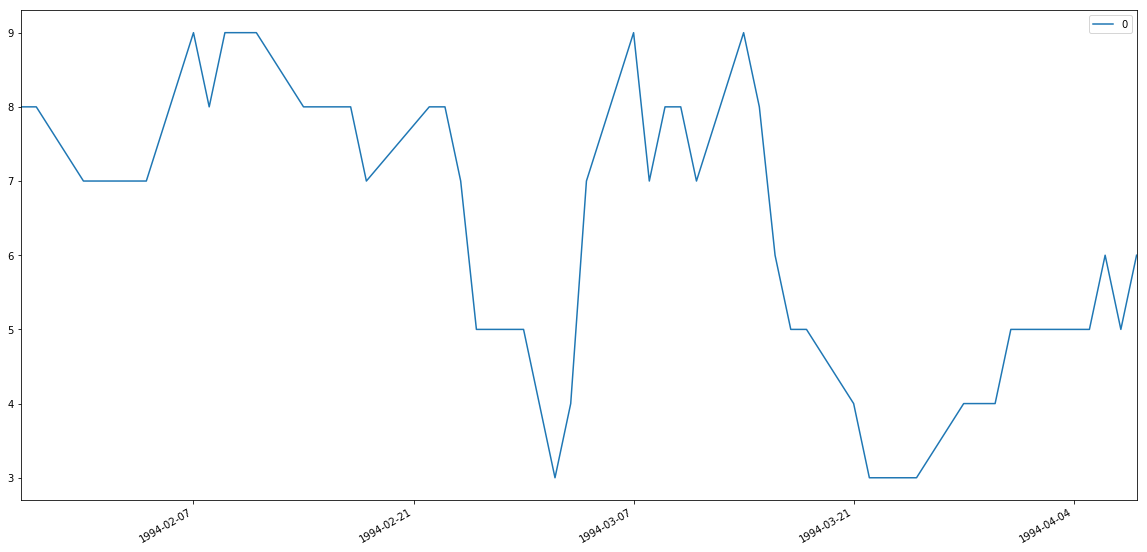

In [176]:
result_q = ind1.extract_vec(data_df)
result_q.iloc[252:302].plot()

In [177]:
result_q.head()

,0
1993-01-29,5.0
1993-02-01,5.0
1993-02-02,5.0
1993-02-03,5.0
1993-02-04,5.0


In [178]:
len(np.unique(ind1.extract_vec(data_df)))

12

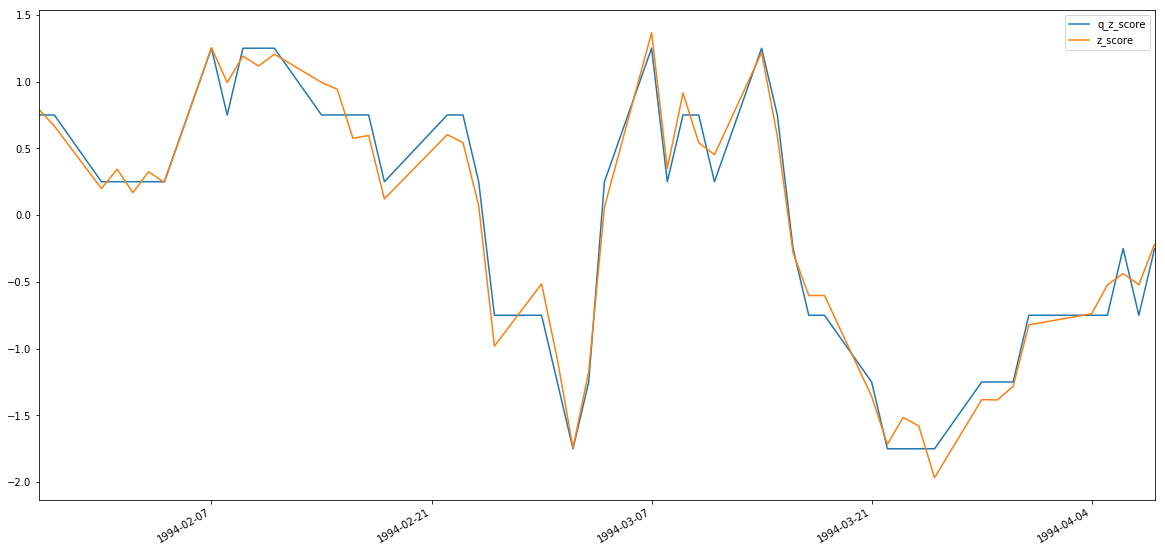

In [179]:
import utils.preprocessing as pp

values = ind1.interval_to_value_vec(ind1.extract_vec(data_df))
result_q['q_z_score'] = values
result_q['z_score'] = ind1.scaler.transform(pp.fill_missing(indf.z_score_vec(data_df)).values.reshape(-1, 1))
result_q[['q_z_score', 'z_score']].iloc[252:302].plot()

## Let's test that on other indicators

12


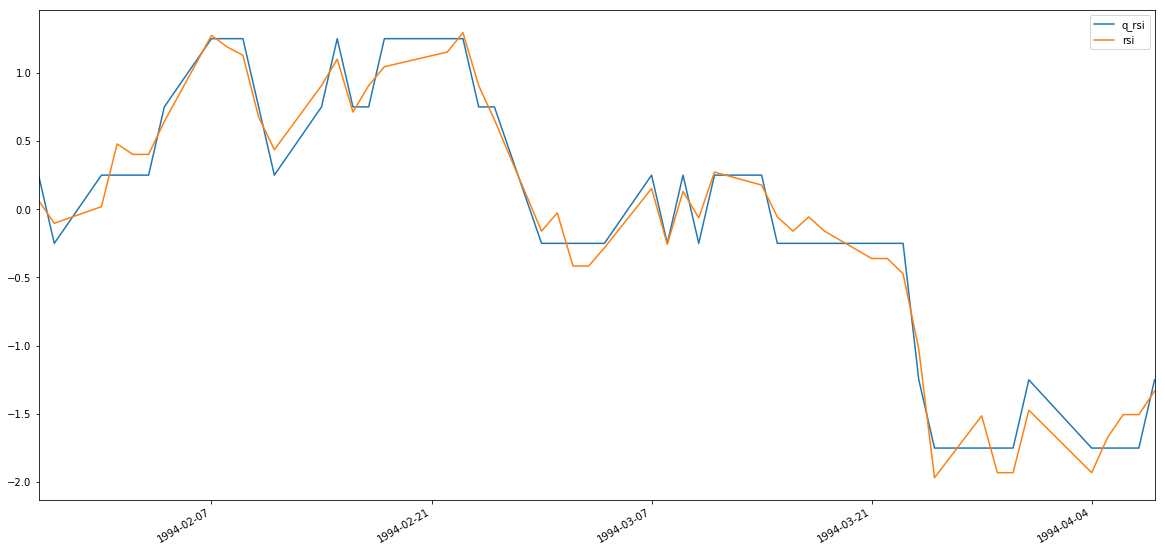

In [193]:
ind2 = Indicator(indf.rsi, indf.rsi_vec, q_levels=arange(-3.0, 3.0, 0.5).tolist(), data_df=data_df)
result_q = ind2.extract_vec(data_df)
print(len(np.unique(ind2.extract_vec(data_df))))
values = ind2.interval_to_value_vec(ind2.extract_vec(data_df))
result_q['q_rsi'] = values
result_q['rsi'] = ind2.scaler.transform(pp.fill_missing(indf.rsi_vec(data_df)).values.reshape(-1, 1))
result_q[['q_rsi', 'rsi']].iloc[252:302].plot()

### OVB

13


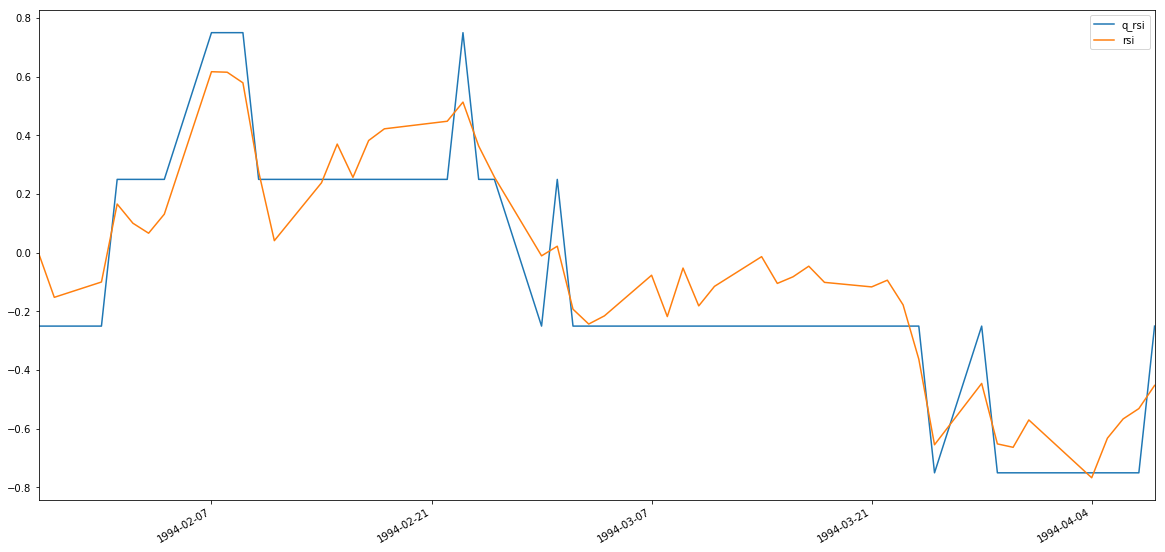

In [196]:
import utils.preprocessing as pp

ind3 = Indicator(indf.on_volume_balance, indf.on_volume_balance_vec, q_levels=arange(-3.0, 3.0, 0.5).tolist(), data_df=data_df)
result_q = ind3.extract_vec(data_df)
print(len(np.unique(ind3.extract_vec(data_df))))
values = ind3.interval_to_value_vec(ind3.extract_vec(data_df))
result_q['q_rsi'] = values
result_q['rsi'] = ind3.scaler.transform(pp.fill_missing(indf.on_volume_balance_vec(data_df)).values.reshape(-1, 1))
result_q[['q_rsi', 'rsi']].iloc[252:302].plot()

## The indicator functions are supposed to return a single, scalar value. Here I will redefine them to do so, and test them.

### RSI

In [197]:
data_df.tail()

feature,Close,High,Low,Open,Volume
date,,,,,
2016-12-23,116.52,116.52,115.59,115.59,14249484.0
2016-12-27,117.26,117.80,116.49,116.52,18296855.0
2016-12-28,116.76,118.02,116.20,117.52,20905892.0
2016-12-29,116.73,117.11,116.40,116.45,15039519.0
2016-12-30,115.82,117.20,115.43,116.65,30586265.0


In [198]:
window = 14

In [199]:
data_sub_df = data_df.iloc[-window-1:]
close = data_sub_df['Close']
delta = close.diff()
up, down = delta.copy(), delta.copy()
up[up < 0] = 0
down[down > 0] = 0
rs = up[1:].mean() / down[1:].abs().mean()
res_rsi = 1.0 - (1.0 / (1.0 + rs))  # Normalized to 1.0 instead of 100.0

In [200]:
up.shape

(15,)

In [201]:
print(up[-window:].shape)
up[1:].mean()

(14,)


0.33785714285714313

Ok, that would work

In [202]:
def rsi(data_df, window=14):
    """
    Relative Strength Index.
    :param data_df: Unstacked for one symbol only.
    :param window: An integer number of days to look back.
    """
    if (window + 1) > data_df.shape[0]:
        return np.nan
    data_sub_df = data_df.iloc[-window-1:]
    close = data_sub_df['Close']
    delta = close.diff()
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    try:
        rs = up[1:].mean() / down[1:].abs().mean()
        return 1.0 - (1.0 / (1.0 + rs))  # Normalized to 1.0 instead of 100.0
    except ZeroDivisionError:
        return np.nan

In [203]:
rsi(data_df.iloc[:-1])

0.770857814336075

In [204]:
def rsi_old(data_df, window):
    close = data_df['Close']
    delta = close.diff()
    delta = delta.iloc[1:]
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    roll_up = up.rolling(window=window, center=False).mean()
    roll_down = down.abs().rolling(window=window, center=False).mean()
    rs = roll_up / roll_down
    return 1.0 - (1.0 / (1.0 + rs))

In [205]:
old_rsi_res = rsi_old(data_df, window=window)
old_rsi_res.head(20)

date
1993-02-01         NaN
1993-02-02         NaN
1993-02-03         NaN
1993-02-04         NaN
1993-02-05         NaN
1993-02-08         NaN
1993-02-09         NaN
1993-02-10         NaN
1993-02-11         NaN
1993-02-12         NaN
1993-02-16         NaN
1993-02-17         NaN
1993-02-18         NaN
1993-02-19    0.326087
1993-02-22    0.225000
1993-02-23    0.230769
1993-02-24    0.225000
1993-02-25    0.309524
1993-02-26    0.317073
1993-03-01    0.350000
Name: Close, dtype: float64

In [206]:
from time import time as time

tic = time()
COL_NAME = 'new_rsi'
new_rsi_dict = {}
for index in range(data_df.shape[0]):
    new_rsi_dict[data_df.index[index]] = rsi(data_df.iloc[:index+1])
new_rsi_res = pd.DataFrame.from_dict(new_rsi_dict, orient='index')
toc = time()
print('Elapsed time = {} s'.format((toc-tic)))

Elapsed time = 12.668549299240112 s


In [207]:
new_rsi_res = pd.DataFrame.from_dict(new_rsi_dict, orient='index')
new_rsi_res.head(20)

,0
1993-01-29,NaN
1993-02-01,NaN
1993-02-02,NaN
1993-02-03,NaN
1993-02-04,NaN
1993-02-05,NaN
1993-02-08,NaN
1993-02-09,NaN
1993-02-10,NaN
1993-02-11,NaN


In [208]:
u1 = pd.DataFrame()

In [209]:
u1['col'] = {'ind1':'lele'}
u1

,col
ind1,ind1


Comparison

In [210]:
comp_df = new_rsi_res.join(old_rsi_res)
comp_df.head(20)

,0,Close
1993-01-29,NaN,NaN
1993-02-01,NaN,NaN
1993-02-02,NaN,NaN
1993-02-03,NaN,NaN
1993-02-04,NaN,NaN
1993-02-05,NaN,NaN
1993-02-08,NaN,NaN
1993-02-09,NaN,NaN
1993-02-10,NaN,NaN
1993-02-11,NaN,NaN


In [211]:
comp_df['diff'] = comp_df[0] - comp_df['Close']
comp_df.head(20)

,0,Close,diff
1993-01-29,NaN,NaN,NaN
1993-02-01,NaN,NaN,NaN
1993-02-02,NaN,NaN,NaN
1993-02-03,NaN,NaN,NaN
1993-02-04,NaN,NaN,NaN
1993-02-05,NaN,NaN,NaN
1993-02-08,NaN,NaN,NaN
1993-02-09,NaN,NaN,NaN
1993-02-10,NaN,NaN,NaN
1993-02-11,NaN,NaN,NaN


In [212]:
comp_df['diff'].abs().sum()

3.199662756969701e-13

Ok, it looks good to me.

Now, the problem is: if the real time function is used performance will be lower but design easier. I think I will use it initially, to test the system. Later may switch to a better implementation.

## Z-score

In [213]:
data_sub_df = data_df.iloc[-window:]
close = data_sub_df['Close']
res_z = (close[-1] - close.mean()) / close.std()

In [214]:
close.shape

(14,)

In [215]:
def z_score(data_df, window=14):
    """
    Standardized deviation of the prices in a window.
    :param data_df: Unstacked for one symbol only.
    :param window: An integer number of days to look back.
    """
    if window  > data_df.shape[0]:
        return np.nan
    if type(data_df) is pd.DataFrame:
        data_sub_df = data_df.iloc[-window:]
        close = data_sub_df['Close']
        return (close[-1] - close.mean()) / close.std()
    elif type(data_df) is np.ndarray:
        close = data_df[-window:]
        return (close[-1] - np.mean(close)) / np.std(close, ddof=1)
    else:
        return np.nan

In [216]:
"""def z_score(data, window=14):
    if window  > data.shape[0]:
        return np.nan
    close = data[-window:,0]
    return (close[-1] - np.mean(close)) / np.std(close, ddof=1)"""

'def z_score(data, window=14):\n    if window  > data.shape[0]:\n        return np.nan\n    close = data[-window:,0]\n    return (close[-1] - np.mean(close)) / np.std(close, ddof=1)'

In [217]:
def z_score_old(data_df, window=14):
    """
    Standardized deviation of the prices in a window.
    :param data_df: Unstacked for one symbol only.
    :param window: An integer number of days to look back.
    """
    close = data_df['Close']
    return close.rolling(window=window, center=False).apply(lambda x: (x[-1] - x.mean()) / x.std(ddof=1))

In [218]:
old_z_score = z_score_old(data_df, window)
old_z_score.head(20)

date
1993-01-29         NaN
1993-02-01         NaN
1993-02-02         NaN
1993-02-03         NaN
1993-02-04         NaN
1993-02-05         NaN
1993-02-08         NaN
1993-02-09         NaN
1993-02-10         NaN
1993-02-11         NaN
1993-02-12         NaN
1993-02-16         NaN
1993-02-17         NaN
1993-02-18   -0.751201
1993-02-19   -0.644297
1993-02-22   -0.431776
1993-02-23   -0.694637
1993-02-24   -0.899994
1993-02-25   -0.079981
1993-02-26   -1.466416
Name: Close, dtype: float64

In [219]:
from time import time as time

tic = time()
COL_NAME = 'new_z_score'
new_dict = {}
for index in range(data_df.shape[0]):
    new_dict[data_df.index[index]] = z_score(data_df.iloc[:index+1])
new_z_score = pd.DataFrame.from_dict(new_dict, orient='index')
toc = time()
print('Elapsed time = {} s'.format((toc-tic)))

comp_df = new_z_score.join(old_z_score)
comp_df['diff'] = comp_df[0] - comp_df['Close']
print(comp_df['diff'].abs().sum())
comp_df.head(20)

Elapsed time = 3.561579942703247 s
7.862261074846348e-12


,0,Close,diff
1993-01-29,NaN,NaN,NaN
1993-02-01,NaN,NaN,NaN
1993-02-02,NaN,NaN,NaN
1993-02-03,NaN,NaN,NaN
1993-02-04,NaN,NaN,NaN
1993-02-05,NaN,NaN,NaN
1993-02-08,NaN,NaN,NaN
1993-02-09,NaN,NaN,NaN
1993-02-10,NaN,NaN,NaN
1993-02-11,NaN,NaN,NaN


In [220]:
close = data_df['Close']
close.head()

date
1993-01-29    2.12
1993-02-01    2.19
1993-02-02    2.15
1993-02-03    2.14
1993-02-04    2.12
Name: Close, dtype: float64

In [221]:
(close[14] - close[:14].mean()) / close[:14].std()

-0.75120064111013196

I don't understand what the "rolling" function is doing, but it gives some small errors... Perhaps, as it is calculating the values differently, it has some rounding errors, but they seem too big for that. In any case the "real time" version seems to be OK.

### One last test....

In [222]:
data_df.head()

feature,Close,High,Low,Open,Volume
date,,,,,
1993-01-29,2.12,2.19,2.11,0.0,66525200.0
1993-02-01,2.19,2.19,2.12,0.0,60138400.0
1993-02-02,2.15,2.20,2.15,0.0,45584000.0
1993-02-03,2.14,2.18,2.09,0.0,66046400.0
1993-02-04,2.12,2.15,2.11,0.0,52038000.0


In [223]:
from functools import partial

fun2 = partial(z_score, window=14)

In [224]:
fun2(data_df.values)

array([-0.45964164, -0.45964153, -0.45964167, -0.45964157,  2.04339259])

In [225]:
new_z_score.iloc[-1]

0   -0.276742
Name: 2016-12-30 00:00:00, dtype: float64

In [226]:
z_rolling_hybrid = data_df['Close'].rolling(14).apply(partial(z_score, window=14))
print(z_rolling_hybrid.shape)
z_rolling_hybrid.name = 'rolling'
z_rolling_hybrid.head(20)

(6024,)


date
1993-01-29         NaN
1993-02-01         NaN
1993-02-02         NaN
1993-02-03         NaN
1993-02-04         NaN
1993-02-05         NaN
1993-02-08         NaN
1993-02-09         NaN
1993-02-10         NaN
1993-02-11         NaN
1993-02-12         NaN
1993-02-16         NaN
1993-02-17         NaN
1993-02-18   -0.751201
1993-02-19   -0.644297
1993-02-22   -0.431776
1993-02-23   -0.694637
1993-02-24   -0.899994
1993-02-25   -0.079981
1993-02-26   -1.466416
Name: rolling, dtype: float64

In [227]:
comp_df = comp_df.join(z_rolling_hybrid)
comp_df['diff2'] = comp_df[0] - comp_df['rolling']
print(comp_df['diff2'].abs().sum())
comp_df.head(20)

7.862261074846348e-12


,0,Close,diff,rolling,diff2
1993-01-29,NaN,NaN,NaN,NaN,NaN
1993-02-01,NaN,NaN,NaN,NaN,NaN
1993-02-02,NaN,NaN,NaN,NaN,NaN
1993-02-03,NaN,NaN,NaN,NaN,NaN
1993-02-04,NaN,NaN,NaN,NaN,NaN
1993-02-05,NaN,NaN,NaN,NaN,NaN
1993-02-08,NaN,NaN,NaN,NaN,NaN
1993-02-09,NaN,NaN,NaN,NaN,NaN
1993-02-10,NaN,NaN,NaN,NaN,NaN
1993-02-11,NaN,NaN,NaN,NaN,NaN


### OK, the difference between implementations has to do with the fact that Pandas uses std with ddof=1 (degrees of freedom) but numpy uses ddof=0 as default.

## On Volume Balance

In [228]:
obv_delta = data_df['Volume'] * np.sign(data_df['Close'].diff())
res_obv = obv_delta.rolling(window=window, center=False).sum()

In [229]:
def on_volume_balance(data_df, window=14):
    """
    On Volume Balance (OBV).
    :param data_df: Unstacked for one symbol only.
    :param window: An integer number of days to look back.
    """
    if window+1  > data_df.shape[0]:
        return np.nan
    data_sub_df = data_df.iloc[-window-1:]
    obv_delta = data_sub_df['Volume'] * np.sign(data_sub_df['Close'].diff())
    return obv_delta[-window:].sum()

In [230]:
def on_volume_balance_old(data_df, window=14):
    """
    On Volume Balance (OBV).
    :param data_df: Unstacked for one symbol only.
    :param window: An integer number of days to look back.
    """
    obv_delta = data_df['Volume'] * np.sign(data_df['Close'].diff())
    return obv_delta.rolling(window=window, center=False).sum()

In [231]:
old_obv = on_volume_balance_old(data_df, window)
old_obv.name = 'Close'
old_obv.head(20)

date
1993-01-29            NaN
1993-02-01            NaN
1993-02-02            NaN
1993-02-03            NaN
1993-02-04            NaN
1993-02-05            NaN
1993-02-08            NaN
1993-02-09            NaN
1993-02-10            NaN
1993-02-11            NaN
1993-02-12            NaN
1993-02-16            NaN
1993-02-17            NaN
1993-02-18            NaN
1993-02-19   -353533600.0
1993-02-22   -388981600.0
1993-02-23   -391916000.0
1993-02-24   -397538400.0
1993-02-25   -303693600.0
1993-02-26   -285510400.0
Name: Close, dtype: float64

In [232]:
from time import time as time

tic = time()
new_dict = {}
for index in range(data_df.shape[0]):
    new_dict[data_df.index[index]] = on_volume_balance(data_df.iloc[:index+1])
new_obv = pd.DataFrame.from_dict(new_dict, orient='index')
toc = time()
print('Elapsed time = {} s'.format((toc-tic)))

comp_df = new_obv.join(old_obv)
comp_df['diff'] = comp_df[0] - comp_df['Close']
print(comp_df['diff'].abs().sum())
comp_df.head(20)

Elapsed time = 5.588502883911133 s
0.0


,0,Close,diff
1993-01-29,NaN,NaN,NaN
1993-02-01,NaN,NaN,NaN
1993-02-02,NaN,NaN,NaN
1993-02-03,NaN,NaN,NaN
1993-02-04,NaN,NaN,NaN
1993-02-05,NaN,NaN,NaN
1993-02-08,NaN,NaN,NaN
1993-02-09,NaN,NaN,NaN
1993-02-10,NaN,NaN,NaN
1993-02-11,NaN,NaN,NaN


In [239]:
a = np.array([[7]])
a

array([[7]])

In [240]:
a[0,0]

7

In [249]:
ind1.extract(data_df.iloc[:-3])

8

In [247]:
ind1.extract_vec(data_df).iloc[-4]

0    8.0
Name: 2016-12-27 00:00:00, dtype: float64

In [254]:
print(ind2.extract(data_df.iloc[:-30]))
print(ind2.extract_vec(data_df).iloc[-31])

5
0    5.0
Name: 2016-11-16 00:00:00, dtype: float64


In [253]:
print(ind3.extract(data_df.iloc[:-153]))
print(ind3.extract_vec(data_df).iloc[-154])

6
0    6.0
Name: 2016-05-24 00:00:00, dtype: float64
